In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
mnist1= pd.read_csv('./mnisttrain.csv')
lab=mnist1['label']
#Drop the label feature in the original dataset
mnist= mnist1.drop("label",axis=1)
print(mnist.head(1))

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  

[1 rows x 784 columns]


In [5]:
print(mnist.shape)
print(lab.shape)

(42000, 784)
(42000,)


C:\Users\yeshw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


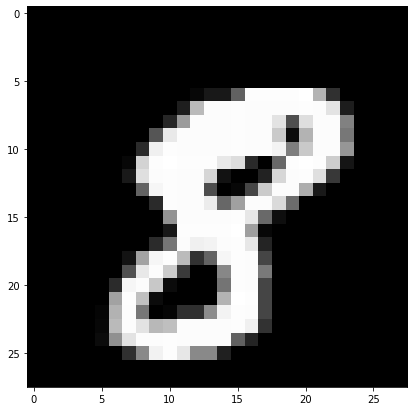

8


In [17]:
plt.figure(figsize=(7,7))
i=10
grid_data = mnist.iloc[i].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()
print(lab[i])

In [7]:
from sklearn.preprocessing import StandardScaler
labels=lab.head(20000)  
data1=mnist.head(20000)
#standardize the data
standardized_data = StandardScaler().fit_transform(data1)
data=standardized_data
print(standardized_data.shape)

(20000, 784)


# Dimensionality Reduction

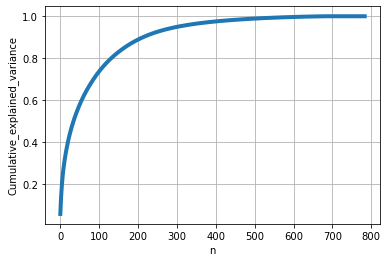

In [18]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components=784
pca_data = pca.fit_transform(data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cumulative_var_explained, linewidth=4)
plt.axis('tight')
plt.grid()
plt.xlabel('n')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In the above figure, 97% of the information is being preserved when it is reduced to 300 dimensions.

# 2D visualization of MNIST Data

In [10]:
# Constructing a co-variance matrix 
covar_matrix = np.matmul(data.T,data)
print (covar_matrix.shape)

(784, 784)


In [19]:
# Finding the top 2 eigen values and vectors
#As the eigen values and vectors are arranged in ascending order, take last 2 values.
from scipy.linalg import eigh 
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors=vectors.T
print(vectors.shape)

(2, 784)


In [22]:
coordinates=np.matmul(vectors,data.T)
coordinates = np.vstack((coordinates, labels)).T
print(coordinates.shape)
new_data=pd.DataFrame(data=coordinates, columns=("1st_principal_axis", "2nd_principal_axis", "label"))
print(new_data.head(10))

(20000, 3)
   1st_principal_axis  2nd_principal_axis  label
0            5.430697            5.060862    1.0
1           -6.242999          -19.293148    0.0
2            1.828611            7.684498    1.0
3           -5.585495            0.440132    4.0
4           -6.333250          -26.597773    0.0
5            0.659000           -1.280238    0.0
6           -6.141977            6.148806    7.0
7           -4.311005           -0.182369    3.0
8            1.429519            0.674158    5.0
9            2.223582           -3.084098    3.0


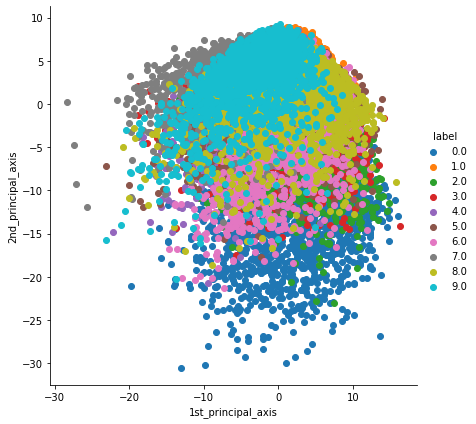

In [23]:
sns.FacetGrid(new_data,hue="label",height=6).map(plt.scatter,'1st_principal_axis','2nd_principal_axis').add_legend()
plt.show()